# Homework-3

## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

## Import make_blobs from sklearn dataset class

In [4]:
from sklearn.datasets import make_blobs

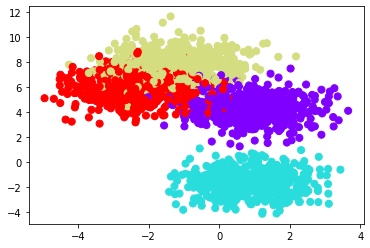

In [5]:
X,y = make_blobs(n_samples=2000, centers=4, n_features=3,cluster_std=1.0, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

## Split your dataset into train and test test (0.7 for train and 0.3 for test).

In [6]:
#Split into train and test set
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state= 50)

In [7]:
X_train.shape

(1400, 3)

# Plots

In [8]:
sns.set_style("darkgrid")

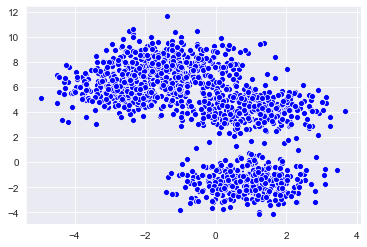

In [9]:
#Scatter plot of train dataset
sns.scatterplot(X_train.T[0], X_train.T[1],color='b')

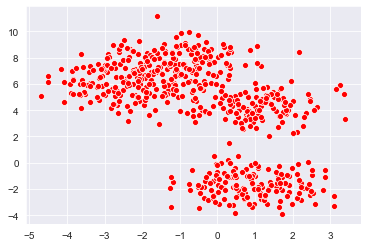

In [10]:
#Scatter plot of test dataset
sns.scatterplot(X_test.T[0], X_test.T[1],color='r')

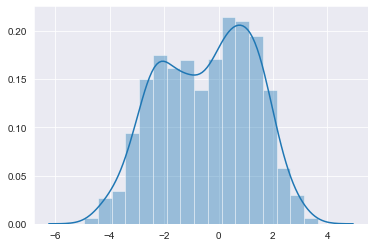

In [11]:
sns.distplot(X_train.T[0])

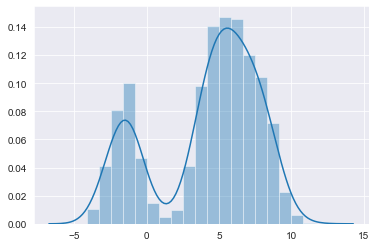

In [12]:
sns.distplot(X_train.T[1])

# Modelling 

## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.9733333333333334


In [14]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       143
           1       1.00      1.00      1.00       157
           2       1.00      0.99      1.00       155
           3       0.94      0.96      0.95       145

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

[[134   0   0   9]
 [  0 157   0   0]
 [  1   0 154   0]
 [  6   0   0 139]]


In [16]:
#Now lets try to do some evaluation for decision tree model using cross validation.

model_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
model_eval.mean()

0.9784869361875226

## XGBoost

In [41]:
import xgboost as xgb

In [42]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [55]:
param = {'max_depth':3, 'eta':1, 'num_class':1}
num_round = 2
model = xgb.train(param, dmatrix_train, num_round)

In [56]:
preds = model.predict(dmatrix_test)
preds[:10]

array([-0.00512192,  1.0021713 ,  1.0021713 , -0.00512192,  1.0021713 ,
        1.0021713 ,  0.23943543, -0.00512192,  2.9995785 , -0.00512192],
      dtype=float32)

In [57]:
best_preds = np.asarray([np.argmax(line) for line in preds])

## Metrics

In [58]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.059583333333333335
Recall = 0.25
Accuracy = 0.23833333333333334


In [ ]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

# Thank you